In [2]:
!pip install yfinance
!pip install pandas
!pip install nbformat

In [5]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [4]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [6]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [8]:
tesla= yf.Ticker("TSLA")

In [11]:
import requests

# URL of the file to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Open a file for writing and write the content of the response
    with open('tesla.json', 'wb') as f:
        f.write(response.content)
    print("File downloaded successfully.")
else:
    print(f"Failed to download file. Status code: {response.status_code}")


File downloaded successfully.


In [23]:
ticker_symbol = 'TSLA'

# Get the ticker object
ticker = yf.Ticker(ticker_symbol)

# Fetch historical data for the maximum available period
tesla_data = ticker.history(period="20y")

# Display the first few rows of the dataframe
print(tesla_data.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


In [24]:
tesla_data.reset_index(inplace=True)

# Display the first five rows of the dataframe
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [26]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"


In [27]:
data  = requests.get(url).text
print(data)


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
		<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
		<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla r

In [28]:
import requests

# Define the URL
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the text of the response as html_data
    html_data = response.text
    print("Webpage content downloaded successfully.")
else:
    print(f"Failed to download webpage. Status code: {response.status_code}")

# Optionally, you can print or further process html_data
# print(html_data)


Webpage content downloaded successfully.


In [37]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the URL
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find all table bodies
    table_bodies = soup.find_all("tbody")
    
    # Extract the second table body (index 1) where the Tesla Revenue table is located
    if len(table_bodies) > 1:
        relevant_table_body = table_bodies[1]  # Assuming Tesla Revenue table is the second table body
        
        # Initialize an empty list to store data
        data = []
        
        # Iterate through rows in the table body
        rows = relevant_table_body.find_all('tr')
        for row in rows:
            # Extract data from columns
            cols = row.find_all('td')
            if len(cols) == 2:  # Ensure there are exactly two columns
                date = cols[0].get_text().strip()
                revenue = cols[1].get_text().strip()
                
                # Append data to the list
                data.append({'Date': date, 'Revenue': revenue})
        
        # Create a DataFrame from the list of dictionaries
        tesla_revenue = pd.DataFrame(data)
        
        # Print the first few rows of the DataFrame to verify
        print(tesla_revenue.head())
    else:
        print("No table found with Tesla Revenue data.")
else:
    print(f"Failed to download webpage. Status code: {response.status_code}")


         Date  Revenue
0  2022-09-30  $21,454
1  2022-06-30  $16,934
2  2022-03-31  $18,756
3  2021-12-31  $17,719
4  2021-09-30  $13,757


In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the URL (replace with actual URL if different)
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find all table bodies
    table_bodies = soup.find_all("tbody")
    
    # Extract the relevant table body where the GameStop Revenue table is located
    if len(table_bodies) > 1:
        # Assuming GameStop Revenue table is located at a specific index (e.g., index 0)
        relevant_table_body = table_bodies[0]  # Adjust index as needed
        
        # Initialize an empty list to store data
        data = []
        
        # Iterate through rows in the table body
        rows = relevant_table_body.find_all('tr')
        for row in rows:
            # Extract data from columns
            cols = row.find_all('td')
            if len(cols) == 2:  # Ensure there are exactly two columns
                date = cols[0].get_text().strip()
                revenue = cols[1].get_text().strip()
                
                # Append data to the list
                data.append({'Date': date, 'Revenue': revenue})
        
        # Create a DataFrame from the list of dictionaries
        gme_revenue = pd.DataFrame(data)
        
        # Clean the 'Revenue' column
        gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$', "")
        gme_revenue.dropna(inplace=True)
        gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]
        
        # Display the last five rows of the gme_revenue DataFrame
        print(gme_revenue.tail())
    else:
        print("No table found with GameStop Revenue data.")
else:
    print(f"Failed to download webpage. Status code: {response.status_code}")


    Date Revenue
8   2013  $2,013
9   2012    $413
10  2011    $204
11  2010    $117
12  2009    $112


TSLA: No data found for this date range, symbol may be delisted


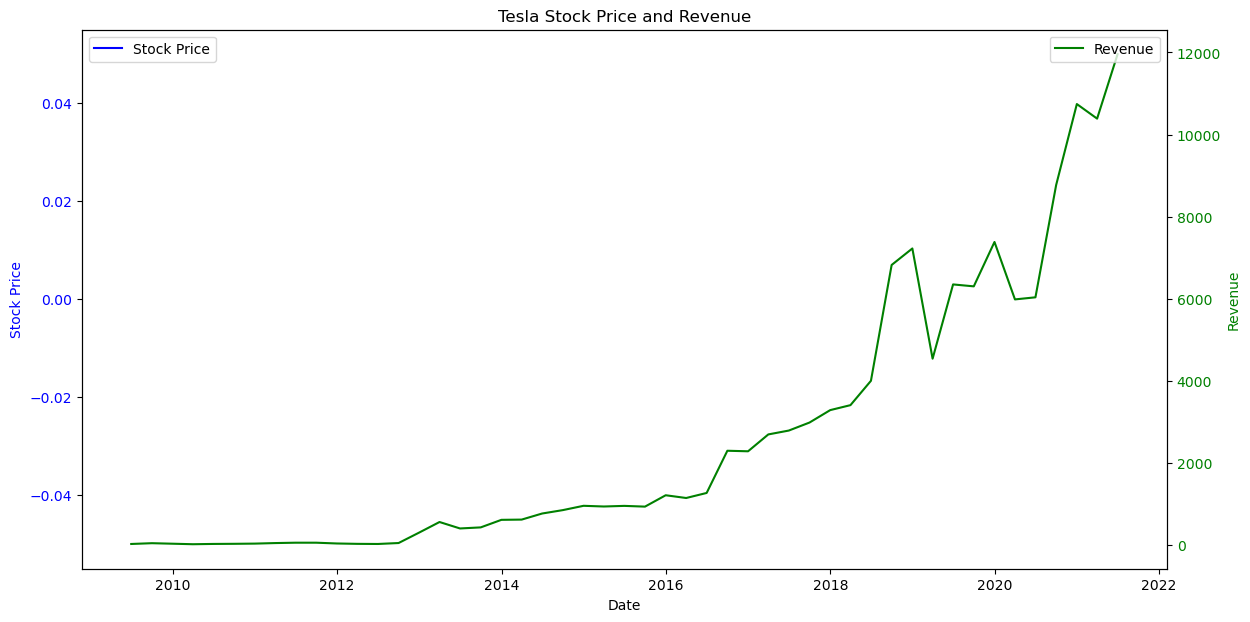

In [7]:
import requests
import yfinance as yf
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Extract Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

# Extract Tesla revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')
    table_bodies = soup.find_all("tbody")
    if len(table_bodies) > 1:
        relevant_table_body = table_bodies[1]  # Adjust index as needed
        data = []
        rows = relevant_table_body.find_all('tr')
        for row in rows:
            cols = row.find_all('td')
            if len(cols) == 2:
                date = cols[0].get_text().strip()
                revenue = cols[1].get_text().strip().replace(',', '').replace('$', '')
                data.append({'Date': date, 'Revenue': revenue})
        tesla_revenue = pd.DataFrame(data)
        tesla_revenue.dropna(inplace=True)
        tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
else:
    print(f"Failed to download webpage. Status code: {response.status_code}")

# Define the make_graph function
def make_graph(stock_data, revenue_data, title):
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])
    
    stock_data = stock_data[stock_data['Date'] <= '2021-06-30']
    revenue_data = revenue_data[revenue_data['Date'] <= '2021-06-30']
    
    fig, ax1 = plt.subplots(figsize=(14, 7))
    ax1.plot(stock_data['Date'], stock_data['Close'], color='blue', label='Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.legend(loc='upper left')
    
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'].astype(float), color='green', label='Revenue')
    ax2.set_ylabel('Revenue', color='green')
    ax2.tick_params(axis='y', labelcolor='green')
    ax2.legend(loc='upper right')
    
    plt.title(f'{title} Stock Price and Revenue')
    plt.show()

# Invoke the make_graph function
make_graph(tesla_data, tesla_revenue, 'Tesla')


GME: No data found for this date range, symbol may be delisted


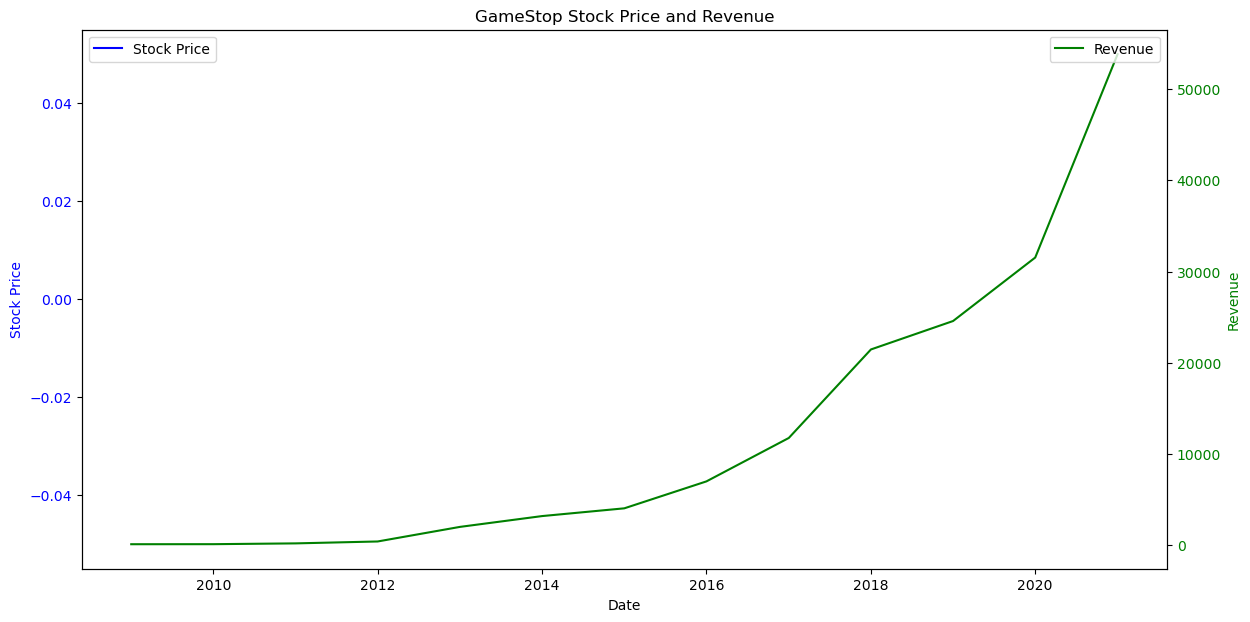

In [8]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Extract GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)

# Extract GameStop revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')
    table_bodies = soup.find_all("tbody")
    if len(table_bodies) > 0:
        relevant_table_body = table_bodies[0]  # Adjust index as needed for GameStop data
        data = []
        rows = relevant_table_body.find_all('tr')
        for row in rows:
            cols = row.find_all('td')
            if len(cols) == 2:
                date = cols[0].get_text().strip()
                revenue = cols[1].get_text().strip().replace(',', '').replace('$', '')
                data.append({'Date': date, 'Revenue': revenue})
        gme_revenue = pd.DataFrame(data)
        gme_revenue.dropna(inplace=True)
        gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]
else:
    print(f"Failed to download webpage. Status code: {response.status_code}")

# Define the make_graph function
def make_graph(stock_data, revenue_data, title):
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])
    
    stock_data = stock_data[stock_data['Date'] <= '2021-06-30']
    revenue_data = revenue_data[revenue_data['Date'] <= '2021-06-30']
    
    fig, ax1 = plt.subplots(figsize=(14, 7))
    ax1.plot(stock_data['Date'], stock_data['Close'], color='blue', label='Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.legend(loc='upper left')
    
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'].astype(float), color='green', label='Revenue')
    ax2.set_ylabel('Revenue', color='green')
    ax2.tick_params(axis='y', labelcolor='green')
    ax2.legend(loc='upper right')
    
    plt.title(f'{title} Stock Price and Revenue')
    plt.show()

# Invoke the make_graph function
make_graph(gme_data, gme_revenue, 'GameStop')
